In [1]:
import pandas as pd

# Read the CSV files
product_catalog = pd.read_csv('original_data/product_catalog.csv')
product_category_map = pd.read_csv('original_data/product_category_map.csv')

# Display the first few rows of each DataFrame
display(product_catalog)
display(product_category_map)

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]
...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,..."
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]"
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]"
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]"


,category_id,parent_category_id
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623
...,...,...
4327,4295,3898
4328,4296,3898
4329,4297,3898
4330,4298,3898


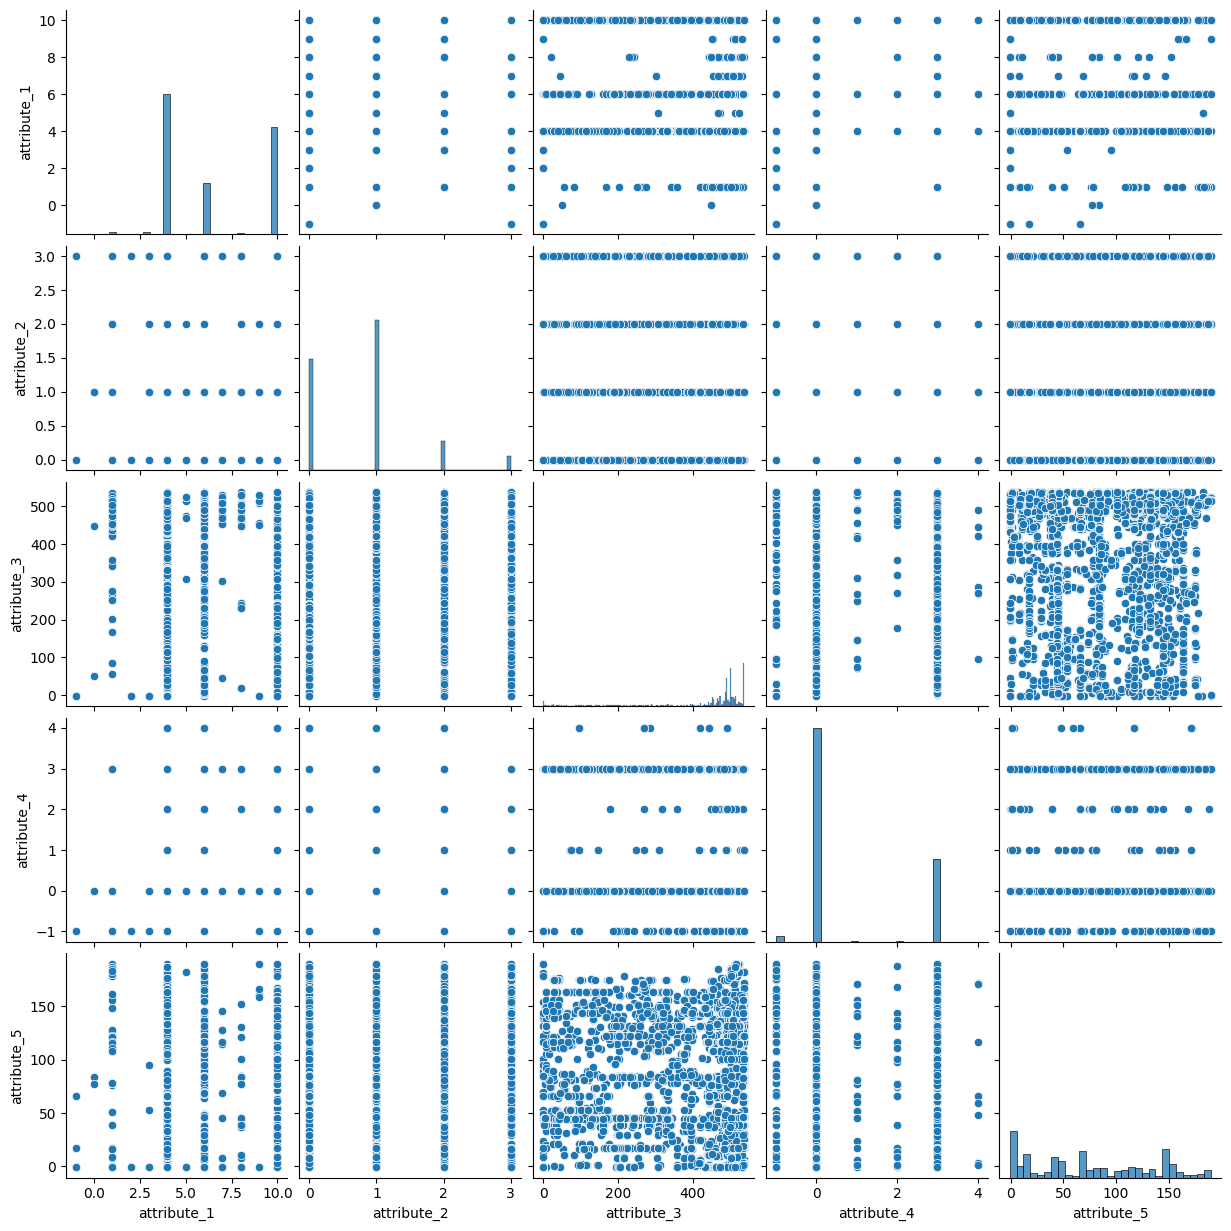

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt

# Select the attribute columns
attributes = product_catalog[['attribute_1', 'attribute_2', 'attribute_3', 'attribute_4', 'attribute_5']]

# Create a pairplot
sns.pairplot(attributes)
plt.show()

In [3]:
import ast

# Transform the 'categories' column from strings to lists
product_catalog['categories'] = product_catalog['categories'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# Count the length of each list in the 'categories' column and create a new column 'categories_length'
product_catalog['categories_length'] = product_catalog['categories'].apply(len)

# Display the updated DataFrame
display(product_catalog)

,product_id,manufacturer_id,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,categories,categories_length
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]",4
1,28640,1366,10,1,537,0,101,[],0
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...",13
3,21399,1090,10,1,511,0,0,[3270],1
4,8504,768,4,1,484,0,66,[2470],1
...,...,...,...,...,...,...,...,...,...
32771,12036,1383,10,0,503,0,101,"[3502, 1088, 2004, 691, 3422, 2308, 308, 3688,...",11
32772,22709,567,4,2,491,3,66,"[3900, 3905, 3903, 3910, 1807, 274, 1467, 914]",8
32773,32322,1385,10,1,500,0,37,"[2686, 2609, 725]",3
32774,19118,1113,6,2,491,0,117,"[3900, 3910, 3903, 2473, 914, 274]",6


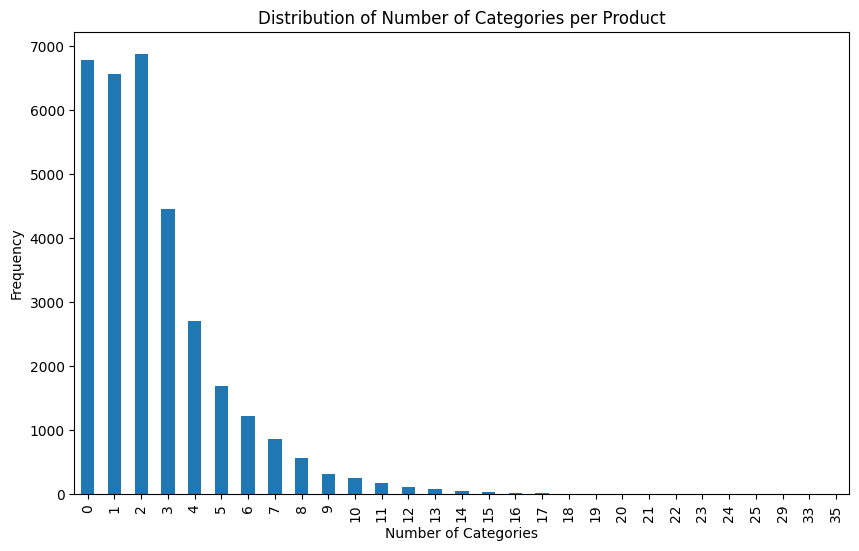

In [4]:
# Generate a bar graph for the lengths of the categories
product_catalog['categories_length'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Categories per Product')
plt.show()

In [5]:
# her iki product ara hesapladık O(n * (n - 1) / 2)
# büyükten küçüğe sıraladık

In [6]:
from tqdm import tqdm
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from joblib import Parallel, delayed

df = product_catalog

# Step 1: One-hot encoding the categories
mlb = MultiLabelBinarizer()
encoded = mlb.fit_transform(df['categories'])
df['vector'] = list(encoded)

# Step 2: Parallelized Cosine Similarity Computation with tqdm
def compute_cosine_similarity(single_vec, all_vectors):
    single_vec_2d = [single_vec]
    sim_scores = cosine_similarity(single_vec_2d, all_vectors)
    return sim_scores.flatten()

all_vectors = df['vector'].tolist()

# Parallelize the computation of cosine similarity for each row with tqdm
similarities = Parallel(n_jobs=-1, backend='loky')(
    delayed(compute_cosine_similarity)(vec, all_vectors) for vec in tqdm(all_vectors)
)

df['similarity'] = similarities

# Display the updated DataFrame
display(df)


  1%|          | 192/32776 [03:31<10:40:50,  1.18s/it]

KeyboardInterrupt: 